
## Compute the associated average outward flux

To have a good quality gradient of the distance map, perform a light smooth over it. Define convolution kernels in each direction and use them recursively. 

In [1]:
import matplotlib.pyplot as plt
from vmtk import vmtkscripts
from vmtk import vtkvmtk
import os
import sys
import numpy as np
import random
import networkx as nx
import vtk

imgr = vmtkscripts.vmtkImageReader()
imgr.InputFileName = os.path.join(os.getcwd(), 'test-surf-normal-hole.mha')
imgr.Execute()

mc = vmtkscripts.vmtkMarchingCubes()
mc.Image = imgr.Image
mc.Level = 1000.0
mc.Execute()

In [2]:
surfr = vmtkscripts.vmtkSurfaceReader()
surfr.InputFileName = os.path.join(os.getcwd(), 'realtest.stl')
surfr.Execute()

surf = surfr.Surface

Reading STL surface file.


In [3]:
fedges = vtk.vtkFeatureEdges()
fedges.BoundaryEdgesOn()
fedges.FeatureEdgesOff()
fedges.ManifoldEdgesOff()
fedges.SetInputData(surf)
fedges.Update()

ofedges = fedges.GetOutput()

numEdges = ofedges.GetNumberOfPoints()

In [4]:
if numEdges != 0:
    tempcapper = vmtkscripts.vmtkSurfaceCapper()
    tempcapper.Surface = surf
    tempcapper.Interactive = 0
    tempcapper.Execute()
    
    networkSurface = tempcapper.Surface
else:
    networkSurface = surf

In [5]:
numCells = surf.GetNumberOfCells()
cellToDelete = random.randrange(0, numCells-1)

networkSurface.BuildLinks()
networkSurface.DeleteCell(cellToDelete)
networkSurface.RemoveDeletedCells()

net = vmtkscripts.vmtkNetworkExtraction()
net.Surface = networkSurface
net.AdvancementRatio = 1.01
net.Execute()

network = net.Network

Progress: 100%Progress: 100%


In [6]:
convert = vmtkscripts.vmtkCenterlinesToNumpy()
convert.Centerlines = network
convert.Execute()
ad = convert.ArrayDict

wrapping vtkPolyData object
converting cell data: 
Topology
converting points
converting point data: 
Radius
converting cell connectivity list


In [7]:
cellDataTopology = ad['CellData']['Topology']

In [8]:
cellDataTopology

array([[ 0,  1],
       [ 1,  2],
       [ 2,  4],
       [ 2,  5],
       [ 3, -1],
       [ 3, 50],
       [ 4,  6],
       [ 4,  7],
       [ 5, -1],
       [ 5, -1],
       [ 6,  8],
       [ 6,  9],
       [ 7, -1],
       [ 8, 10],
       [ 8, 11],
       [ 9, 12],
       [10, -1],
       [10, 14],
       [11, -1],
       [11, -1],
       [13, -1],
       [13, -1],
       [14, 15],
       [14, 16],
       [15, 17],
       [15, 18],
       [16, 19],
       [17, -1],
       [18, 20],
       [19, 21],
       [19, 22],
       [20, -1],
       [20, -1],
       [21, -1],
       [21, -1],
       [22, 25],
       [22, 26],
       [23, 27],
       [23, 28],
       [24, 29],
       [24, -1],
       [25, 30],
       [25, -1],
       [26, -1],
       [27, 31],
       [27, -1],
       [28, 32],
       [28, -1],
       [29, 33],
       [29, -1],
       [30, 34],
       [30, -1],
       [31, 36],
       [31, -1],
       [32, -1],
       [32, -1],
       [33, 37],
       [33, 38],
       [34, 39

In [9]:
fullTopology = np.array(cellDataTopology)

In [10]:
topologyToKeep = np.where(fullTopology[:,0] != 0)[0]

In [11]:
topol = fullTopology[topologyToKeep]

In [12]:
topol.shape

(97, 2)

In [13]:
topol

array([[ 1,  2],
       [ 2,  4],
       [ 2,  5],
       [ 3, -1],
       [ 3, 50],
       [ 4,  6],
       [ 4,  7],
       [ 5, -1],
       [ 5, -1],
       [ 6,  8],
       [ 6,  9],
       [ 7, -1],
       [ 8, 10],
       [ 8, 11],
       [ 9, 12],
       [10, -1],
       [10, 14],
       [11, -1],
       [11, -1],
       [13, -1],
       [13, -1],
       [14, 15],
       [14, 16],
       [15, 17],
       [15, 18],
       [16, 19],
       [17, -1],
       [18, 20],
       [19, 21],
       [19, 22],
       [20, -1],
       [20, -1],
       [21, -1],
       [21, -1],
       [22, 25],
       [22, 26],
       [23, 27],
       [23, 28],
       [24, 29],
       [24, -1],
       [25, 30],
       [25, -1],
       [26, -1],
       [27, 31],
       [27, -1],
       [28, 32],
       [28, -1],
       [29, 33],
       [29, -1],
       [30, 34],
       [30, -1],
       [31, 36],
       [31, -1],
       [32, -1],
       [32, -1],
       [33, 37],
       [33, 38],
       [34, 39],
       [34, 40

In [14]:
nodes = np.arange(1, topol.shape[0]+1)

In [15]:
nodes

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97])

In [16]:
topolWithNodes = np.copy(topol)

In [17]:
endEdgesToReplace = np.where(topolWithNodes[:, :] == -1)[0]

In [21]:
topolWithNodes

array([[ 1,  2],
       [ 2,  4],
       [ 2,  5],
       [ 3, -1],
       [ 3, 50],
       [ 4,  6],
       [ 4,  7],
       [ 5, -1],
       [ 5, -1],
       [ 6,  8],
       [ 6,  9],
       [ 7, -1],
       [ 8, 10],
       [ 8, 11],
       [ 9, 12],
       [10, -1],
       [10, 14],
       [11, -1],
       [11, -1],
       [13, -1],
       [13, -1],
       [14, 15],
       [14, 16],
       [15, 17],
       [15, 18],
       [16, 19],
       [17, -1],
       [18, 20],
       [19, 21],
       [19, 22],
       [20, -1],
       [20, -1],
       [21, -1],
       [21, -1],
       [22, 25],
       [22, 26],
       [23, 27],
       [23, 28],
       [24, 29],
       [24, -1],
       [25, 30],
       [25, -1],
       [26, -1],
       [27, 31],
       [27, -1],
       [28, 32],
       [28, -1],
       [29, 33],
       [29, -1],
       [30, 34],
       [30, -1],
       [31, 36],
       [31, -1],
       [32, -1],
       [32, -1],
       [33, 37],
       [33, 38],
       [34, 39],
       [34, 40

In [18]:
endEdgesToReplace

array([ 3,  7,  8, 11, 15, 17, 18, 19, 20, 26, 30, 31, 32, 33, 39, 41, 42,
       44, 46, 48, 50, 52, 53, 54, 60, 61, 62, 67, 68, 69, 71, 73, 76, 77,
       79, 80, 82, 84, 85, 88, 89, 92, 93, 94, 96])

In [22]:
for idx in endEdgesToReplace:
    if topolWithNodes[idx, 1] == -1:
        topolWithNodes[idx, 1] = nodes[idx]
    elif topolWithNodes[idx, 0] == -1:
        topolWithNodes[idx, 0] = nodes[idx]
    else:
        print('bad')

In [24]:
G = nx.Graph()

In [26]:
G.add_edges_from(topolWithNodes)

In [27]:
G.number_of_edges()

97

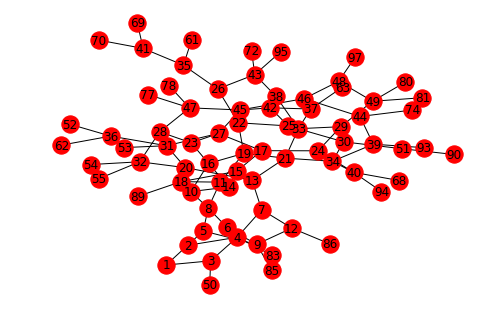

In [30]:
pos = nx.nx_agraph.graphviz_layout(G)
nx.draw(G, pos=pos, with_labels=True)


In [38]:
for nodeidx in G:
    connections = [i for i in nx.all_neighbors(G, nodeidx)]
    if len(connections) < 2:
        print(f'{nodeidx}: {connections}')

50: [3]
53: [31]
54: [32]
55: [32]
61: [35]
62: [36]
63: [37]
68: [40]
69: [41]
70: [41]
72: [43]
74: [44]
77: [47]
78: [47]
80: [49]
81: [49]
83: [4]
85: [9]
86: [12]
89: [18]
90: [51]
52: [36]
93: [39]
94: [40]
95: [43]
97: [48]


In [31]:
for node in G.nodes():
    print(f'{node}, {nx.}')

1
2
3
4
6
5
7
10
8
9
11
15
12
17
13
14
16
22
18
19
20
21
27
23
24
30
31
25
26
34
28
37
38
39
32
42
33
45
29
35
47
36
51
41
43
56
57
58
44
46
62
53
40
48
66
54
49
70
71
72
50
74
75
76
77
79
80
81
52
82
83
86
87
89
90
55
95
96
97
98
-1
103


In [ ]:
n

In [30]:
[i for i in C]

[[(1, 1)],
 [(2, 2)],
 [(4, 5), (5, 6), (6, 4)],
 [(6, 10),
  (10, 17),
  (17, 21),
  (21, 25),
  (25, 31),
  (31, 20),
  (20, 16),
  (16, 12),
  (12, 9),
  (9, 7),
  (7, 5)],
 [(6, 8), (8, 11), (11, 14), (14, 22), (22, 27), (27, 17)],
 [(7, 10)],
 [(9, 15), (15, 8)],
 [(12, 17)],
 [(20, 29), (29, 35), (35, 56), (56, 28), (28, 23), (23, 18), (18, 15)],
 [(31, 37), (37, 45), (45, 28)],
 [(25, 32),
  (32, 38),
  (38, 24),
  (24, 39),
  (39, 33),
  (33, 26),
  (26, 42),
  (42, 34),
  (34, 41),
  (41, 48),
  (48, 43),
  (43, 35)],
 [(21, 26)],
 [(27, 40), (40, 47), (47, 29)],
 [(27, 34)],
 [(22, 34)],
 [(22, 13), (13, 11)],
 [(15, 19), (19, 24)],
 [(23, 37)],
 [(43, 49), (49, 51), (51, 33)],
 [(41, 49)],
 [(36, 58), (58, -1), (-1, 57), (57, 36)]]

In [26]:
pos = nx.nx_agraph.graphviz_layout(C)
nx.draw(C, pos=pos, with_labels=True)

AttributeError: 'generator' object has no attribute 'is_directed'

In [ ]:
endCellIds = []
startCellIds = []
for cellId, cellTop in enumerate(cellDataTopology):
    if cellTop[1] == -1:
        endCellIds.append(cellId)

In [ ]:
endCellIds

In [ ]:
endPointIds = []
for cellId in endCellIds:  
    endPointIds.append(ad['CellData']['CellPointIds'][cellId][-2])

endPointCoordinates = []
for pointId in endPointIds:
    endPointCoordinates.append(ad['Points'][pointId])

In [ ]:
endPointCoordinates

In [ ]:
endPointCoordinates = np.array(endPointCoordinates)

In [ ]:
endPointCoordinates.shape

In [ ]:
sourcePoints = endPointCoordinates[-1]

In [ ]:
sourcePoints.shape

In [ ]:
flatSourcePoints = sourcePoints.flatten(order='C').tolist()

In [ ]:
sourcePoints

In [ ]:
targetPoints = endPointCoordinates[0:-1]

In [ ]:
targetPoints.shape

In [ ]:
flatTargetPoints = targetPoints.flatten(order='C').tolist()

In [ ]:
targetPoints

In [ ]:
cl = vmtkscripts.vmtkCenterlines()
cl.Surface = surf
cl.SeedSelectorName = 'pointlist'
cl.SourcePoints = flatSourcePoints
cl.TargetPoints = flatTargetPoints
cl.Execute()

numberOfCells = surfr.Surface.GetNumberOfCells()
cellToRemove = numberOfCells - 10
cellIds = vtk.vtkIdTypeArray()
cellIds.SetNumberOfComponents(1)
cellIds.InsertNextValue(cellToRemove)

selectionNode = vtk.vtkSelectionNode()
selectionNode.SetFieldType(selectionNode.CELL)
selectionNode.SetContentType(selectionNode.INDICES)
selectionNode.SetSelectionList(cellIds)

selection = vtk.vtkSelection()
selection.AddNode(selectionNode)

extractSelection = vtk.vtkExtractSelection()
extractSelection.SetInputData(0, surf)
extractSelection.SetInputData(1, selection)
extractSelection.Update()
    

select = vmtkscripts.vmtkSurfaceConnectivitySelector()
select.Surface = surfr.Surface
select.Execute()

In [25]:
sv = vmtkscripts.vmtkSurfaceViewer()
sv.Surface = surf
sv.Execute()

Quit renderer


In [ ]:
edit = vmtkscripts.vmtkNetworkEditor()
edit.Network = net.Network
edit.Execute()

In [24]:
cv = vmtkscripts.vmtkCenterlineViewer()
cv.Centerlines = network
cv.Execute()

Quit renderer


In [ ]:
conver

In [ ]:
rend = vmtkscripts.vmtkRenderer()
rend.Execute()

view = vmtkscripts.vmtkSurfaceViewer()
view.vmtkRenderer = rend.vmtkRenderer
view.Opacity = 0.3
view.Surface = surf
view.Execute()

view2 = vmtkscripts.vmtkCenterlineViewer()
view2.vmtkRenderer = rend.vmtkRenderer
view2.Centerlines = cl.Centerlines
view2.Execute()

In [ ]:
write = vmtkscripts.vmtkSurfaceWriter()
write.Surface = net.Network
write.OutputFileName = os.path.join(os.getcwd(), 'test-multi-hole.vtp')
write.Execute()